In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np

#Statistical libraries
import scipy.stats as stats
from statsmodels.stats import weightstats
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kruskal

#Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
IRE_dataset = pd.read_csv('Data/Commuters_by_Industry_by_time_bucket_for_Ireland_Pristine.csv')
IRE_dataset.head()

,Broad Industrial Group,Travelling Time,CensusYear,Statistic Label,UNIT,VALUE
0,"Agriculture, forestry and fishing (A)",Total time travelling,2016,Persons at work 2011,Number,55043.0
1,"Agriculture, forestry and fishing (A)",Total time travelling,2016,Persons at work 2016,Number,50456.0
2,"Agriculture, forestry and fishing (A)",Total time travelling,2016,Percentage change of persons at work 2011-2016,%,-8.3
3,"Agriculture, forestry and fishing (A)",< ¼ hour,2016,Persons at work 2011,Number,20397.0
4,"Agriculture, forestry and fishing (A)",< ¼ hour,2016,Persons at work 2016,Number,19577.0


In [3]:
# Import dataset
EU_dataset = pd.read_csv('Data/Commuters_by_Country_Europe_Pristine.csv')
EU_dataset.head()

,Country,Male,Female,Both_Sexes
0,China,56,38,47.0
1,Turkey,52,28,40.0
2,Korea (the Republic of),74,0,74.0
3,Mexico,49,24,36.5
4,South Africa,44,29,36.5


In [4]:
# Import dataset
EU_TimeBucket_dataset = pd.read_csv('Data/Commuters_by_Country_Europe_by_Time Bracket.csv')
EU_TimeBucket_dataset = EU_TimeBucket_dataset.drop(["From_1_to_9_minutes","1_minute_or_over","From_10_to_14_minutes","From_30_to_59_minutes","30_minutes_or_over","From_15_to_19_minutes","From_20_to_29_minutes"], axis=1)
EU_TimeBucket_dataset.head()

,GEO,Zero_minutes,From_1_to_14_minutes,From_15_to_29_minutes,From_30_to_44_minutes,From_45_to_59_minutes,60_minutes_or_over,No_response
0,Belgium,383.5,1066.0,1499.7,962.7,380.2,513.5,12.2
1,Bulgaria,83.6,562.0,1254.1,951.5,200.2,150.0,27.6
2,Czechia,206.1,1180.9,1792.6,1254.1,365.0,442.5,47.4
3,Denmark,150.1,724.0,901.3,569.7,216.8,228.5,79.1
4,Germany,1648.1,10887.0,12605.4,7941.2,2556.4,3314.7,2689.5


In [5]:
IRE_dataset = IRE_dataset.drop(["CensusYear"], axis=1)
IRE_dataset.head()

,Broad Industrial Group,Travelling Time,Statistic Label,UNIT,VALUE
0,"Agriculture, forestry and fishing (A)",Total time travelling,Persons at work 2011,Number,55043.0
1,"Agriculture, forestry and fishing (A)",Total time travelling,Persons at work 2016,Number,50456.0
2,"Agriculture, forestry and fishing (A)",Total time travelling,Percentage change of persons at work 2011-2016,%,-8.3
3,"Agriculture, forestry and fishing (A)",< ¼ hour,Persons at work 2011,Number,20397.0
4,"Agriculture, forestry and fishing (A)",< ¼ hour,Persons at work 2016,Number,19577.0


In [6]:
IRE_dataset4Viz = IRE_dataset.drop(["UNIT"], axis=1)
IRE_dataset4Viz = IRE_dataset4Viz.loc[IRE_dataset4Viz['Statistic Label'] == 'Persons at work 2016']
IRE_dataset4Viz = IRE_dataset4Viz.loc[IRE_dataset4Viz['Travelling Time'].isin(['< ¼ hour', '¼ hour - < ½ hour', '½ hour - < ¾ hour','¾ hour - < 1 hour','1 hour - < 1½ hours','1½ hours and over','Not stated'])]
IRE_dataset4Viz.rename(columns={'VALUE':'Population Size (1000s)'}, inplace=True)
IRE_dataset4Viz.rename(columns={'Travelling Time':'Commute Times'}, inplace=True)
IRE_dataset4Viz.head()

,Broad Industrial Group,Commute Times,Statistic Label,Population Size (1000s)
4,"Agriculture, forestry and fishing (A)",< ¼ hour,Persons at work 2016,19577.0
7,"Agriculture, forestry and fishing (A)",¼ hour - < ½ hour,Persons at work 2016,9910.0
10,"Agriculture, forestry and fishing (A)",½ hour - < ¾ hour,Persons at work 2016,5557.0
13,"Agriculture, forestry and fishing (A)",¾ hour - < 1 hour,Persons at work 2016,1307.0
16,"Agriculture, forestry and fishing (A)",1 hour - < 1½ hours,Persons at work 2016,1878.0


In [7]:
IRE_dataset = IRE_dataset.drop(["UNIT"], axis=1)
IRE_dataset = IRE_dataset.loc[IRE_dataset['Statistic Label'] == 'Persons at work 2016']
IRE_dataset = IRE_dataset.loc[IRE_dataset['Broad Industrial Group'] == 'Total at work']
IRE_dataset = IRE_dataset.loc[IRE_dataset['Travelling Time'].isin(['< ¼ hour', '¼ hour - < ½ hour', '½ hour - < ¾ hour','¾ hour - < 1 hour','1 hour - < 1½ hours','1½ hours and over','Not stated'])]
IRE_dataset.head()

,Broad Industrial Group,Travelling Time,Statistic Label,VALUE
532,Total at work,< ¼ hour,Persons at work 2016,430221.0
535,Total at work,¼ hour - < ½ hour,Persons at work 2016,550257.0
538,Total at work,½ hour - < ¾ hour,Persons at work 2016,396252.0
541,Total at work,¾ hour - < 1 hour,Persons at work 2016,143351.0
544,Total at work,1 hour - < 1½ hours,Persons at work 2016,147124.0


In [8]:
IRE_dataset

,Broad Industrial Group,Travelling Time,Statistic Label,VALUE
532,Total at work,< ¼ hour,Persons at work 2016,430221.0
535,Total at work,¼ hour - < ½ hour,Persons at work 2016,550257.0
538,Total at work,½ hour - < ¾ hour,Persons at work 2016,396252.0
541,Total at work,¾ hour - < 1 hour,Persons at work 2016,143351.0
544,Total at work,1 hour - < 1½ hours,Persons at work 2016,147124.0
547,Total at work,1½ hours and over,Persons at work 2016,52798.0
550,Total at work,Not stated,Persons at work 2016,155770.0


# Descritive Stats

In [9]:
EU_dataset.dtypes

Country        object
Male            int64
Female          int64
Both_Sexes    float64
dtype: object

In [10]:
EU_dataset.shape

(29, 4)

In [11]:
EU_dataset.describe()

,Male,Female,Both_Sexes
count,29.000000,29.000000,29.000000
mean,35.448276,21.551724,29.775862
std,11.809761,6.417533,10.648261
min,21.000000,0.000000,20.000000
25%,28.000000,18.000000,23.500000
50%,32.000000,21.000000,27.000000
75%,43.000000,25.000000,31.000000
max,74.000000,38.000000,74.000000


In [12]:
EU_TimeBucket_dataset.dtypes

GEO                       object
Zero_minutes             float64
From_1_to_14_minutes     float64
From_15_to_29_minutes    float64
From_30_to_44_minutes    float64
From_45_to_59_minutes    float64
60_minutes_or_over       float64
No_response              float64
dtype: object

In [13]:
EU_TimeBucket_dataset.shape

(32, 8)

In [14]:
EU_TimeBucket_dataset.describe()

,Zero_minutes,From_1_to_14_minutes,From_15_to_29_minutes,From_30_to_44_minutes,From_45_to_59_minutes,60_minutes_or_over,No_response
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,393.171875,2278.071875,2560.196875,1637.190625,483.250000,698.409375,302.421875
std,595.798981,3057.355322,3254.741175,2106.596053,664.157098,1016.178923,552.683339
min,5.400000,36.100000,48.100000,15.300000,0.000000,5.100000,0.000000
25%,74.800000,400.825000,577.850000,340.800000,84.750000,116.250000,9.150000
50%,156.450000,1008.150000,1278.500000,763.700000,208.500000,274.750000,64.450000
75%,386.600000,1947.450000,2698.125000,1686.250000,600.000000,601.075000,300.825000
max,2429.300000,10887.000000,12605.400000,7941.200000,2556.400000,4130.500000,2689.500000


In [15]:
IRE_dataset.dtypes

Broad Industrial Group     object
Travelling Time            object
Statistic Label            object
VALUE                     float64
dtype: object

In [16]:
IRE_dataset.shape

(7, 4)

In [17]:
IRE_dataset.describe()

,VALUE
count,7.000000
mean,267967.571429
std,187744.990752
min,52798.000000
25%,145237.500000
50%,155770.000000
75%,413236.500000
max,550257.000000


# Confidnece Interval

In [18]:
#We create our confidence interval using Student's T at 90% confidence

X = EU_dataset.iloc[:,3].values
#EU_dataset_Short

#X
stats.t.interval(confidence=0.9, df=len(X)-1, loc= np.mean(X), scale = stats.sem(X))

(26.412160625502725, 33.1395635124283)


At a 90% confidence level, this tells us based on the sample we can expect to see between 26 and 33 minute commutes on avergae for our sample.

# T-Test

In [19]:
TotalAverageCommute = IRE_dataset.loc[IRE_dataset['Broad Industrial Group'] =='Total at work']
TotalAverageCommute.head()

,Broad Industrial Group,Travelling Time,Statistic Label,VALUE
532,Total at work,< ¼ hour,Persons at work 2016,430221.0
535,Total at work,¼ hour - < ½ hour,Persons at work 2016,550257.0
538,Total at work,½ hour - < ¾ hour,Persons at work 2016,396252.0
541,Total at work,¾ hour - < 1 hour,Persons at work 2016,143351.0
544,Total at work,1 hour - < 1½ hours,Persons at work 2016,147124.0


In [20]:
TotalAverageCommute = TotalAverageCommute[TotalAverageCommute['Travelling Time'].isin(['< ¼ hour', '¼ hour - < ½ hour', '½ hour - < ¾ hour', '¾ hour - < 1 hour','1 hour - < 1½ hours','1½ hours and over','Not stated'])]
TotalAverageCommute.head()

,Broad Industrial Group,Travelling Time,Statistic Label,VALUE
532,Total at work,< ¼ hour,Persons at work 2016,430221.0
535,Total at work,¼ hour - < ½ hour,Persons at work 2016,550257.0
538,Total at work,½ hour - < ¾ hour,Persons at work 2016,396252.0
541,Total at work,¾ hour - < 1 hour,Persons at work 2016,143351.0
544,Total at work,1 hour - < 1½ hours,Persons at work 2016,147124.0


In [21]:
TotalAverageCommute = TotalAverageCommute.loc[TotalAverageCommute['Statistic Label'] =='Persons at work 2016']
TotalAverageCommute

,Broad Industrial Group,Travelling Time,Statistic Label,VALUE
532,Total at work,< ¼ hour,Persons at work 2016,430221.0
535,Total at work,¼ hour - < ½ hour,Persons at work 2016,550257.0
538,Total at work,½ hour - < ¾ hour,Persons at work 2016,396252.0
541,Total at work,¾ hour - < 1 hour,Persons at work 2016,143351.0
544,Total at work,1 hour - < 1½ hours,Persons at work 2016,147124.0
547,Total at work,1½ hours and over,Persons at work 2016,52798.0
550,Total at work,Not stated,Persons at work 2016,155770.0


In [22]:
def Time_Convert_Max(row):
    if row['Travelling Time'] == '< ¼ hour':
        val = 15
    elif row['Travelling Time'] == '¼ hour - < ½ hour':
        val = 30
    elif row['Travelling Time'] == '½ hour - < ¾ hour':
        val = 45
    elif row['Travelling Time'] == '¾ hour - < 1 hour':
        val = 60
    elif row['Travelling Time'] == '1 hour - < 1½ hours':
        val = 90
    elif row['Travelling Time'] == '1½ hours and over':
        val = 90
    elif row['Travelling Time'] == 'Not stated':
        val = 0
    else:
        val = 0
    return val

In [23]:
In [1]: TotalAverageCommute['Time_Max'] = TotalAverageCommute.apply(Time_Convert_Max, axis=1)
TotalAverageCommute

,Broad Industrial Group,Travelling Time,Statistic Label,VALUE,Time_Max
532,Total at work,< ¼ hour,Persons at work 2016,430221.0,15
535,Total at work,¼ hour - < ½ hour,Persons at work 2016,550257.0,30
538,Total at work,½ hour - < ¾ hour,Persons at work 2016,396252.0,45
541,Total at work,¾ hour - < 1 hour,Persons at work 2016,143351.0,60
544,Total at work,1 hour - < 1½ hours,Persons at work 2016,147124.0,90
547,Total at work,1½ hours and over,Persons at work 2016,52798.0,90
550,Total at work,Not stated,Persons at work 2016,155770.0,0


In [24]:
def Time_Convert_Min(row):
    if row['Travelling Time'] == '< ¼ hour':
        val = 1
    elif row['Travelling Time'] == '¼ hour - < ½ hour':
        val = 15
    elif row['Travelling Time'] == '½ hour - < ¾ hour':
        val = 30
    elif row['Travelling Time'] == '¾ hour - < 1 hour':
        val = 45
    elif row['Travelling Time'] == '1 hour - < 1½ hours':
        val = 60
    elif row['Travelling Time'] == '1½ hours and over':
        val = 90
    elif row['Travelling Time'] == 'Not stated':
        val = 0
    else:
        val = 0
    return val

In [25]:
In [1]: TotalAverageCommute['Time_Min'] = TotalAverageCommute.apply(Time_Convert_Min, axis=1)
TotalAverageCommute

,Broad Industrial Group,Travelling Time,Statistic Label,VALUE,Time_Max,Time_Min
532,Total at work,< ¼ hour,Persons at work 2016,430221.0,15,1
535,Total at work,¼ hour - < ½ hour,Persons at work 2016,550257.0,30,15
538,Total at work,½ hour - < ¾ hour,Persons at work 2016,396252.0,45,30
541,Total at work,¾ hour - < 1 hour,Persons at work 2016,143351.0,60,45
544,Total at work,1 hour - < 1½ hours,Persons at work 2016,147124.0,90,60
547,Total at work,1½ hours and over,Persons at work 2016,52798.0,90,90
550,Total at work,Not stated,Persons at work 2016,155770.0,0,0


In [26]:
TotalAverageCommute['Time_Avg'] = (TotalAverageCommute['Time_Min'] + TotalAverageCommute['Time_Max']) / 2
TotalAverageCommute

,Broad Industrial Group,Travelling Time,Statistic Label,VALUE,Time_Max,Time_Min,Time_Avg
532,Total at work,< ¼ hour,Persons at work 2016,430221.0,15,1,8.0
535,Total at work,¼ hour - < ½ hour,Persons at work 2016,550257.0,30,15,22.5
538,Total at work,½ hour - < ¾ hour,Persons at work 2016,396252.0,45,30,37.5
541,Total at work,¾ hour - < 1 hour,Persons at work 2016,143351.0,60,45,52.5
544,Total at work,1 hour - < 1½ hours,Persons at work 2016,147124.0,90,60,75.0
547,Total at work,1½ hours and over,Persons at work 2016,52798.0,90,90,90.0
550,Total at work,Not stated,Persons at work 2016,155770.0,0,0,0.0


In [27]:
TotalAverageCommute['Time_Weighted'] = TotalAverageCommute['Time_Avg'] * TotalAverageCommute['VALUE']
TotalAverageCommute

,Broad Industrial Group,Travelling Time,Statistic Label,VALUE,Time_Max,Time_Min,Time_Avg,Time_Weighted
532,Total at work,< ¼ hour,Persons at work 2016,430221.0,15,1,8.0,3441768.0
535,Total at work,¼ hour - < ½ hour,Persons at work 2016,550257.0,30,15,22.5,12380782.5
538,Total at work,½ hour - < ¾ hour,Persons at work 2016,396252.0,45,30,37.5,14859450.0
541,Total at work,¾ hour - < 1 hour,Persons at work 2016,143351.0,60,45,52.5,7525927.5
544,Total at work,1 hour - < 1½ hours,Persons at work 2016,147124.0,90,60,75.0,11034300.0
547,Total at work,1½ hours and over,Persons at work 2016,52798.0,90,90,90.0,4751820.0
550,Total at work,Not stated,Persons at work 2016,155770.0,0,0,0.0,0.0


In [28]:
WeightedSum = TotalAverageCommute ['Time_Weighted'].sum () 
WeightedSum

53994048.0

In [29]:
PopSum = TotalAverageCommute ['VALUE'].sum () 
PopSum

1875773.0

In [30]:
Avg_Irish_Commute = WeightedSum/PopSum
Avg_Irish_Commute

28.784958521100368

In [31]:
#Avg_EU_Commute = 25

In [32]:
#H0: x̄/mu = Irish time is same as EU Average of 25 mins
#H1: x̄/mu different than EU Average of 25 mins

In [33]:
X = EU_dataset['Both_Sexes']

In [34]:
mu = Avg_Irish_Commute

# Normal (Z TEST)

In [35]:
#We compute z and p-value

z_score, p_value = weightstats.ztest(X, value = mu, ddof = 1, alternative = 'two-sided')

z_score

0.5011314786641567

In [36]:
p_value

0.6162785941329143

In this case, we accept H0, then we have evidence to say that Ireland's average commute times are similar to those in the EU.

# T- TEST

In [37]:
stats.ttest_1samp(X,25)

t_stat, p_value = stats.ttest_1samp(X, mu)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 0.5011314786641567
P-value: 0.6201957092290915


In [38]:
transposed_EU_TimeBucket_dataset = pd.melt(EU_TimeBucket_dataset, id_vars=['GEO'], var_name='Time_Bucket', value_name='VALUE')

In [39]:
#Shapiro test No_response

stats.shapiro(transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="No_response"])

ShapiroResult(statistic=0.5974071025848389, pvalue=3.4784143565502745e-08)

# ANOVA 2-Tailed

<Figure size 640x480 with 0 Axes>

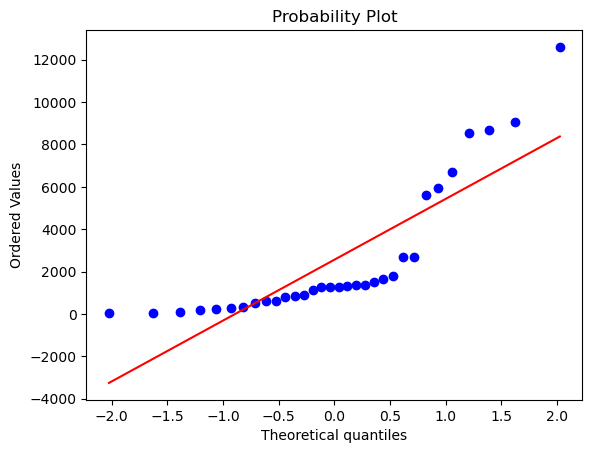

<Figure size 640x480 with 0 Axes>

In [40]:
#QQ-plot

stats.probplot(EU_TimeBucket_dataset.From_15_to_29_minutes, plot = plt)
plt.figure()

In [41]:
#transposed_EU_TimeBucket_dataset = pd.melt(EU_TimeBucket_dataset, id_vars=['GEO'], var_name='Time_Bucket', value_name='VALUE')

In [42]:
transposed_EU_TimeBucket_dataset

,GEO,Time_Bucket,VALUE
0,Belgium,Zero_minutes,383.5
1,Bulgaria,Zero_minutes,83.6
2,Czechia,Zero_minutes,206.1
3,Denmark,Zero_minutes,150.1
4,Germany,Zero_minutes,1648.1
...,...,...,...
219,United Kingdom,No_response,754.3
220,Iceland,No_response,19.5
221,Norway,No_response,0.0
222,Switzerland,No_response,62.8


Now we will perform a Shapiro Wilk test
H0: data comes from a normal distribution // H1: data does not come from a normal distribution

In [43]:
#Shapiro test Zero_minutes
stats.shapiro(transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="Zero_minutes"])

ShapiroResult(statistic=0.6432220935821533, pvalue=1.3629309592033678e-07)

In [44]:
#Shapiro test From_1_to_14_minutes

stats.shapiro(transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="From_1_to_14_minutes"])

ShapiroResult(statistic=0.7036488652229309, pvalue=9.861580565484473e-07)

In [45]:
#Shapiro test From_15_to_29_minutes

stats.shapiro(transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="From_15_to_29_minutes"])

ShapiroResult(statistic=0.7256731986999512, pvalue=2.1541993646678748e-06)

In [46]:
#Shapiro test From_30_to_44_minutes

stats.shapiro(transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="From_30_to_44_minutes"])

ShapiroResult(statistic=0.7290364503860474, pvalue=2.4349817522306694e-06)

In [47]:
#Shapiro test From_45_to_59_minutes

stats.shapiro(transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="From_45_to_59_minutes"])

ShapiroResult(statistic=0.6938837766647339, pvalue=7.051514785416657e-07)

In [48]:
#Shapiro test 60_minutes_or_over

stats.shapiro(transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="60_minutes_or_over"])

ShapiroResult(statistic=0.6843088865280151, pvalue=5.10668712649931e-07)

In [49]:
#Shapiro test No_response

stats.shapiro(transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="No_response"])

ShapiroResult(statistic=0.5974071025848389, pvalue=3.4784143565502745e-08)

Many of the groups are not normally distributed

Now we will check if we can assume equality of the variances

In [50]:
#we create the objects per time bucket
Zero_minutes = transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="Zero_minutes"]
From_1_to_14_minutes = transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="From_1_to_14_minutes"]
From_15_to_29_minutes = transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="From_15_to_29_minutes"]
From_30_to_44_minutes = transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="From_30_to_44_minutes"]
From_45_to_59_minutes = transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="From_45_to_59_minutes"]
_60_minutes_or_over = transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="60_minutes_or_over"]
No_response = transposed_EU_TimeBucket_dataset.VALUE[transposed_EU_TimeBucket_dataset.Time_Bucket=="No_response"]

In [51]:
#Homogeinity of the variances --> Levene test

#H0: the variances are equal
#H1: the variances are not equal

levene(Zero_minutes,From_1_to_14_minutes,From_15_to_29_minutes,From_30_to_44_minutes,From_45_to_59_minutes,_60_minutes_or_over,No_response,center = 'mean')

LeveneResult(statistic=17.22185296006305, pvalue=2.9109683462257287e-16)

#ANOVA 2-Tailed
#H0 = means are equal
#H1 = at least one mean is different

In [52]:
model = ols('VALUE~GEO+Time_Bucket', data=transposed_EU_TimeBucket_dataset).fit()
aov = sm.stats.anova_lm(model, type = 2)
print(aov)

                df        sum_sq       mean_sq          F        PR(>F)
GEO           31.0  5.255884e+08  1.695446e+07  10.642876  3.422781e-27
Time_Bucket    6.0  1.736042e+08  2.893404e+07  18.162851  1.496482e-16
Residual     186.0  2.963043e+08  1.593034e+06        NaN           NaN


We reject the null hypothesis That there's no differences between commute times across the EU countires and the time blocks

Due to the issues with the data from the above tests we cannot use parametric tests and instead must use non-parametric tests to describe characteristics of the data.

# Anova 1-Way

In [53]:
#H0 : mu east = mu south = mu north
#H1 : there are at least 2 mu that are different oen to another one

#We work with ANOVA One Way --> We analyse the charges based on  (region)

model1Way = ols('VALUE~GEO', data=transposed_EU_TimeBucket_dataset).fit()
aov1Way = sm.stats.anova_lm(model1Way, type = 2)
print(aov1Way)

             df        sum_sq       mean_sq         F        PR(>F)
GEO        31.0  5.255884e+08  1.695446e+07  6.927426  2.771008e-18
Residual  192.0  4.699086e+08  2.447441e+06       NaN           NaN


We reject the null hypothesis That there's no differences between commute times across the EU.

# Kruskal-Wallis Test

In [54]:
#Step 1: Hypothesis

#H0: there is no difference in the Commute Times for Men and Women in EU Countries
#H1: there is at least one country that presents a different commute time

#Step 2: we create the variables

Male = EU_dataset['Male']
Female = EU_dataset['Female']
Both_Sexes = EU_dataset['Both_Sexes']

In [55]:
stat, p = kruskal(Male, Female, Both_Sexes)

print('Statistical Test:', stat)
print("p-value:", p)

Statistical Test: 33.50732972627299
p-value: 5.296339284178958e-08


we reject the H0
Interpretation: at a 5% significance level we have no evidence to indicate that the commute times are the same in the EU Countries

In [56]:
TotalAverageCommute

,Broad Industrial Group,Travelling Time,Statistic Label,VALUE,Time_Max,Time_Min,Time_Avg,Time_Weighted
532,Total at work,< ¼ hour,Persons at work 2016,430221.0,15,1,8.0,3441768.0
535,Total at work,¼ hour - < ½ hour,Persons at work 2016,550257.0,30,15,22.5,12380782.5
538,Total at work,½ hour - < ¾ hour,Persons at work 2016,396252.0,45,30,37.5,14859450.0
541,Total at work,¾ hour - < 1 hour,Persons at work 2016,143351.0,60,45,52.5,7525927.5
544,Total at work,1 hour - < 1½ hours,Persons at work 2016,147124.0,90,60,75.0,11034300.0
547,Total at work,1½ hours and over,Persons at work 2016,52798.0,90,90,90.0,4751820.0
550,Total at work,Not stated,Persons at work 2016,155770.0,0,0,0.0,0.0


# Creating the files for the next stge: Vizualisation Stage

In [57]:
# write the dataframe to a csv file

transposed_EU_TimeBucket_dataset.to_csv('Viz_Data\VizData_TimeBrackets_Global.csv', index=False)
EU_dataset.to_csv('Viz_Data\VizData_GenderSplit_Global.csv', index=False)
IRE_dataset4Viz.to_csv('Viz_Data\VizData_IRE.csv', index=False)
